In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
%matplotlib inline

#from google.colab import drive

#drive.mount('/content/drive')

**NOTE:** did not clean for odometer. Should at take only entries with an odometer value greater than zero, and should at least exclude the 8888 entries. 

## Loading data frame

In [12]:
# caitlin's local file path
data_path = 'C:/Users/Caitlin/Documents/DataScience/WIMLDS/cleaned/'
df = pd.read_csv(data_path + 'sample.csv', parse_dates=['TEST_SDATE','TEST_EDATE'], lineterminator='\n')


## Target variable, reduce

In [13]:
list(df)

['RecordID',
 'RECORD_NUM',
 'VIR_CERT_NUMBER',
 'STATION_NUM',
 'ANALYZER_NUM',
 'INSPECTOR_NUM',
 'TEST_TYPE',
 'VID_TEST_TYPE',
 'TEST_SDATE',
 'TEST_EDATE',
 'VIN',
 'VIN_SOURCE',
 'VEH_LICENSE',
 'GVW_TYPE',
 'GVWR',
 'MODEL_YEAR',
 'MAKE',
 'MODEL',
 'CYL',
 'ENGINE_SIZE',
 'TRANS_TYPE',
 'DUAL_EXHAUST',
 'ODOMETER',
 'FUEL_TYPE',
 'VEHICLE_TYPE',
 'EMISS_COST',
 'ZIP_CODE',
 'CERTIFICATION',
 'ESC',
 'VRT_RECORD_ID',
 'E_TEST_SEQUENCE',
 'E_PRECOND_PROCEDURE',
 'E_HIGH_DCF',
 'E_HIGH_RPM',
 'E_HIGH_CO2',
 'E_HIGH_O2',
 'E_HIGH_HC',
 'E_HIGH_HC_DCF',
 'E_HIGH_HC_LIMIT',
 'E_HIGH_CO',
 'E_HIGH_CO_DCF',
 'E_HIGH_CO_LIMIT',
 'E_IDLE_DCF',
 'E_IDLE_RPM',
 'E_IDLE_CO2',
 'E_IDLE_O2',
 'E_IDLE_HC',
 'E_IDLE_HC_DCF',
 'E_IDLE_HC_LIMIT',
 'E_IDLE_CO',
 'E_IDLE_CO_DCF',
 'E_IDLE_CO_LIMIT',
 'E_HIGH_DCF_2',
 'E_HIGH_RPM_2',
 'E_HIGH_CO2_2',
 'E_HIGH_O2_2',
 'E_HIGH_HC_2',
 'E_HIGH_HC_DCF_2',
 'E_HIGH_CO_2',
 'E_HIGH_CO_DCF_2',
 'E_IDLE_DCF_2',
 'E_IDLE_RPM_2',
 'E_IDLE_CO2_2',
 'E_IDLE_O2_

In [5]:
# keep_cols = ['VIR_CERT_NUMBER', 'STATION_NUM', 'ANALYZER_NUM', 'INSPECTOR_NUM', 'TEST_SDATE', 'TEST_EDATE', 'VIN', 'VIN_SOURCE',
#              'VEH_LICENSE', 'GVW_TYPE', 'GVWR', 'MODEL_YEAR', 'MAKE', 'MODEL', 'CYL', 'ENGINE_SIZE', 'TRANS_TYPE', 
#              'DUAL_EXHAUST', 'ODOMETER', 'FUEL_TYPE', 'VEHICLE_TYPE', 'ZIP_CODE', 'CERTIFICATION', 'ESC', 'VRT_RECORD_ID', 
#              'ABORT_CODE', 'SOFTWARE_VERSION', 'INSP_COMMENTS', 'OVERALL_RESULT', 'ABORT_CODE_OTHER_DESC', 'MECHANIC_LAST_NAME',
#              'MECHANIC_FIRST_NAME', 'MECHANIC_MIDDLE_INIT', 'ENGINE_SIZE_ORIG', 'VID_TEST_TYPE']

# df = df[keep_cols]

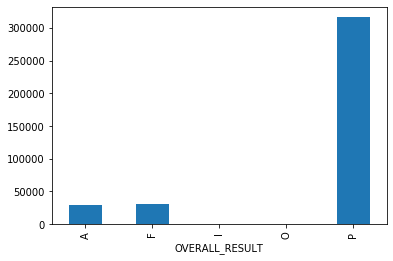

In [14]:
df.groupby('OVERALL_RESULT').size().plot.bar()

In [15]:
df.OVERALL_RESULT.value_counts()

P    316732
F     30051
A     28701
O        10
I         9
Name: OVERALL_RESULT, dtype: int64

##### Select only pass & fail

In [16]:
df = df[(df.OVERALL_RESULT == 'P')|(df.OVERALL_RESULT=='F')]

##### Pass/Fail is the target variable: change P to 0 and F to 1 
*Fail is the target - what we want to detect. It makes the signal detection interpretation more intuitive to use "Fail" as the target of 1*

In [17]:
df['OVERALL_RESULT']=df['OVERALL_RESULT'].replace({'P':0,'F':1})

In [18]:
df.OVERALL_RESULT.value_counts()

0    316732
1     30051
Name: OVERALL_RESULT, dtype: int64

##### Create age variable

In [19]:
df['AGE'] = pd.to_datetime(df["TEST_EDATE"]).dt.year - df["MODEL_YEAR"]

In [20]:
df['AGE'] += 1

In [21]:
# Age distribution
#fig, ax = plt.subplots(figsize=(14,6))
#df.groupby('AGE').size().plot.bar()

### Clean `Odometer`

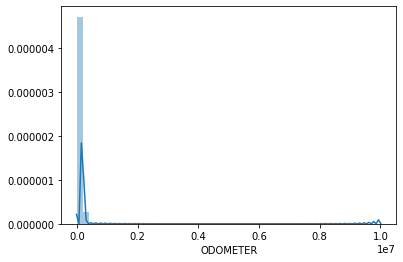

In [180]:
sns.distplot(df.ODOMETER)

In [183]:
df.ODOMETER.value_counts()

0          952
100000     227
8888888    201
88888      107
888888      51
          ... 
238577       1
232436       1
261114       1
300055       1
2047         1
Name: ODOMETER, Length: 169743, dtype: int64

In [187]:
df_clean = df[~df['ODOMETER'].isin([0,100000, 888, 8888, 88888, 888888, 8888888])]

In [189]:
print(f'eliminating the "bad" values in the odometer column, {len(df_clean)}entries remain from {len(df)} or {round(len(df_clean)/len(df)*100,2)}%')

eliminating the "bad" values in the odometer column, 345242entries remain from 346783 or 99.56%


In [192]:
# some suspicious values still seem to be there.....
df_clean.ODOMETER.value_counts()

10000     47
50000     38
56000     37
15000     35
120000    34
          ..
331560     1
32646      1
1929       1
12172      1
2049       1
Name: ODOMETER, Length: 169737, dtype: int64

## Checkout VINs

In [190]:
len(df_clean.VIN.unique())

127562

In [191]:
len(df_clean)

345242

### To do

#### Compare the number of times the car has been tested with the age of the car

#### Compare the number of times the car has been tested with Pass/Fail

In [194]:
df_clean['TOTAL_VISITS'] = df_clean.VIN.groupby(df_clean.VIN).transform('count')

C:\Users\Caitlin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [195]:
len(df_clean[df_clean['TOTAL_VISITS']>1]), len(df_clean[df_clean['TOTAL_VISITS']==1])

(292963, 52279)

In [196]:
len(df_clean)

345242

In [197]:
df_clean.TOTAL_VISITS.value_counts()

1     52279
2     50548
3     46023
4     42776
5     40795
6     37872
7     32165
8     22296
9     11799
10     4750
11     2167
12      900
13      468
14      196
15      105
17       51
18       36
16       16
Name: TOTAL_VISITS, dtype: int64

In [198]:
print(f'Out of {len(df_clean)} entries in the system, {len(df_clean[df_clean.TOTAL_VISITS==1])} or {round(len(df_clean[df_clean.TOTAL_VISITS==1])/len(df_clean)*100,2)}% are in the system only once, and {len(df_clean[df_clean.TOTAL_VISITS>1])} or {round(len(df_clean[df_clean.TOTAL_VISITS>1])/len(df_clean)*100, 2)}% are in the system more than once.')

Out of 345242 entries in the system, 52279 or 15.14% are in the system only once, and 292963 or 84.86% are in the system more than once.


*get number of pass/fail for each car*

In [199]:
test = df_clean.groupby('VIN')['OVERALL_RESULT'].value_counts().unstack().fillna(0)

In [200]:
test.head()

OVERALL_RESULT,0,1
VIN,,
0F1AC4222PB200660,1.0,0.0
0FMCU93158KD84024,1.0,0.0
0N1BC11E69L466681,1.0,0.0
0N8AR05SXVW181282,1.0,0.0
0S4BP62C377301194,1.0,0.0


In [201]:
test = test.reset_index()

In [202]:
test

OVERALL_RESULT,VIN,0,1
0,0F1AC4222PB200660,1.0,0.0
1,0FMCU93158KD84024,1.0,0.0
2,0N1BC11E69L466681,1.0,0.0
3,0N8AR05SXVW181282,1.0,0.0
4,0S4BP62C377301194,1.0,0.0
...,...,...,...
127557,ZFFYR51A3X0116639,0.0,3.0
127558,ZFFYR51R9X0118072,0.0,1.0
127559,ZFFYT53A310122964,2.0,0.0
127560,ZHWGU12T36LA03105,5.0,1.0


In [203]:
df2 = pd.merge(df,test, on='VIN')

In [204]:
list(df2)

['RecordID',
 'RECORD_NUM',
 'VIR_CERT_NUMBER',
 'STATION_NUM',
 'ANALYZER_NUM',
 'INSPECTOR_NUM',
 'TEST_TYPE',
 'VID_TEST_TYPE',
 'TEST_SDATE',
 'TEST_EDATE',
 'VIN',
 'VIN_SOURCE',
 'VEH_LICENSE',
 'GVW_TYPE',
 'GVWR',
 'MODEL_YEAR',
 'MAKE',
 'MODEL',
 'CYL',
 'ENGINE_SIZE',
 'TRANS_TYPE',
 'DUAL_EXHAUST',
 'ODOMETER',
 'FUEL_TYPE',
 'VEHICLE_TYPE',
 'EMISS_COST',
 'ZIP_CODE',
 'CERTIFICATION',
 'ESC',
 'VRT_RECORD_ID',
 'E_TEST_SEQUENCE',
 'E_PRECOND_PROCEDURE',
 'E_HIGH_DCF',
 'E_HIGH_RPM',
 'E_HIGH_CO2',
 'E_HIGH_O2',
 'E_HIGH_HC',
 'E_HIGH_HC_DCF',
 'E_HIGH_HC_LIMIT',
 'E_HIGH_CO',
 'E_HIGH_CO_DCF',
 'E_HIGH_CO_LIMIT',
 'E_IDLE_DCF',
 'E_IDLE_RPM',
 'E_IDLE_CO2',
 'E_IDLE_O2',
 'E_IDLE_HC',
 'E_IDLE_HC_DCF',
 'E_IDLE_HC_LIMIT',
 'E_IDLE_CO',
 'E_IDLE_CO_DCF',
 'E_IDLE_CO_LIMIT',
 'E_HIGH_DCF_2',
 'E_HIGH_RPM_2',
 'E_HIGH_CO2_2',
 'E_HIGH_O2_2',
 'E_HIGH_HC_2',
 'E_HIGH_HC_DCF_2',
 'E_HIGH_CO_2',
 'E_HIGH_CO_DCF_2',
 'E_IDLE_DCF_2',
 'E_IDLE_RPM_2',
 'E_IDLE_CO2_2',
 'E_IDLE_O2_

In [205]:
df2=df2.rename(columns=({1:'TOTAL_FAILS', 0:'TOTAL_PASSES'}))

In [206]:
len(df2)

346523

Create another dataframe that will keep only 1 copy from the duplicates that are there. It keeps the last one that it finds, which in this case means it keeps the most recent entry for each car. 

This means that in the plots there will only be 1 entry for each car and it will represent the total number of visits, passes, and fails that that car has had. 

In [207]:
#df2 = df2.sort_values(by=['VIN', 'TOTAL_VISITS'])
df2 = df2.sort_values(by=['VIN', 'TEST_EDATE']) 

In [208]:
df3=df2.drop_duplicates('VIN', keep='last')

In [209]:
df3.tail()

,RecordID,RECORD_NUM,VIR_CERT_NUMBER,STATION_NUM,ANALYZER_NUM,INSPECTOR_NUM,TEST_TYPE,VID_TEST_TYPE,TEST_SDATE,TEST_EDATE,VIN,VIN_SOURCE,VEH_LICENSE,GVW_TYPE,GVWR,MODEL_YEAR,MAKE,MODEL,CYL,ENGINE_SIZE,TRANS_TYPE,DUAL_EXHAUST,ODOMETER,FUEL_TYPE,VEHICLE_TYPE,EMISS_COST,ZIP_CODE,CERTIFICATION,ESC,VRT_RECORD_ID,E_TEST_SEQUENCE,E_PRECOND_PROCEDURE,E_HIGH_DCF,E_HIGH_RPM,E_HIGH_CO2,E_HIGH_O2,E_HIGH_HC,E_HIGH_HC_DCF,E_HIGH_HC_LIMIT,E_HIGH_CO,E_HIGH_CO_DCF,E_HIGH_CO_LIMIT,E_IDLE_DCF,E_IDLE_RPM,E_IDLE_CO2,E_IDLE_O2,E_IDLE_HC,E_IDLE_HC_DCF,E_IDLE_HC_LIMIT,E_IDLE_CO,E_IDLE_CO_DCF,E_IDLE_CO_LIMIT,E_HIGH_DCF_2,E_HIGH_RPM_2,E_HIGH_CO2_2,E_HIGH_O2_2,E_HIGH_HC_2,E_HIGH_HC_DCF_2,E_HIGH_CO_2,E_HIGH_CO_DCF_2,E_IDLE_DCF_2,E_IDLE_RPM_2,E_IDLE_CO2_2,E_IDLE_O2_2,E_IDLE_HC_2,E_IDLE_HC_DCF_2,E_IDLE_CO_2,E_IDLE_CO_DCF_2,E_RESULT_STRING,V_SMOKE1,V_SMOKE2,V_GASCAP,V_CAT,V_RESULT,KOEO_RESULT,KOER_RESULT,OBD_RDY_MISFIRE,OBD_RDY_FUEL,OBD_RDY_COMPONENT,OBD_RDY_CAT,OBD_RDY_CAT_HEATED,OBD_RDY_EVAP,OBD_RDY_SEC_AIR,OBD_RDY_AIR_COND,OBD_RDY_O2_SENSOR,OBD_RDY_O2_HEATER,OBD_RDY_EGR,OBD_RDY_RESULT,OBD_PID,OBD_PCM_ID,OBD_VIN,OBD_FLT_CODES,OBD_FLT_RESULT,OBD_MIL_STATUS,OBD_RESULT,ONLINE_STATUS,OFFLINE_REASON_CODE,ABORT_CODE,SOFTWARE_VERSION,INSP_COMMENTS,OVERALL_RESULT,R_TOTAL_COST,R_EGR,R_ELECTRICAL,R_EVAP_CONTROL,R_EXHAUST,R_IGNITION,R_INTAKE,R_ENGINE,R_PCV,R_OTHER,SentToWW,ABORT_CODE_OTHER_DESC,OBDII_AFFECT_OVERALL,E_HIGH_CO_RESULT,E_HIGH_HC_RESULT,E_IDLE_CO_RESULT,E_IDLE_HC_RESULT,MECHANIC_LAST_NAME,MECHANIC_FIRST_NAME,MECHANIC_MIDDLE_INIT,ENGINE_SIZE_ORIG,FAILED_IDLE_RPM,SENTTOVID,Station_License_Number,Analyzer_Number,Insert_DateTime\r,AGE,NUM_VISITS,TOTAL_VISITS,TOTAL_PASSES,TOTAL_FAILS
238267,4463571,1233,8684299.0,IS478,W167,AC083912,I,NaN,2019-07-09 09:03:25,2019-07-09 09:09:51,ZFFYR51A3X0116639,S,MXR131,1.0,3625,1999,FERRARI,360 MODENA,8,3600,M,N,31981,G,1,15.00,87107,C,6.0,990100,1,1,0.0,0,0.0,0.0,0,0,100,0.0,0.0,1.0,0.0,0,0.0,0.0,0,0,100,0.0,0.0,1.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,N,N,P,P,P,P,P,P,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,2.0,2.0,0.0,A,15.0,14,NaN,NaN,P,1.0,A,1,0,NaN,249,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,N,N,N,N,Valdez,Clarence,R,NaN,NaN,0.0,IS478,W167,2019-07-09 08:10:28\r,21,3,3,0.0,3.0
157985,930429,449,5187968.0,IR085,W005,11002374,I,I,2007-08-14 09:49:00,2007-08-14 09:53:00,ZFFYR51R9X0118072,M,483NHA,1.0,3625,1999,FERRARI,360 MODENA,12,3600,A,N,16646,G,1,19.95,87109,F,6.0,990100,1,1,0.0,0,0.0,0.0,0,0,100,0.0,0.0,1.0,0.0,0,0.0,0.0,0,0,100,0.0,0.0,1.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,N,P,N,O,N,N,P,P,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,A,22.0,11,NaN,NaN,P,1.0,A,1,0,NaN,158,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Y,N,N,N,N,VIGIL,LUCIAN,W,3.6L,NaN,0.0,IR085,W005,2007-08-23 06:58:35\r,9,1,1,0.0,1.0
98665,1306491,1190,5632819.0,IR386,W121,24992010,I,I,2008-11-13 15:36:00,2008-11-13 15:40:00,ZFFYT53A310122964,S,807NTN,1.0,3625,2001,FERRARI,360 SPIDER,8,3600,A,N,9427,G,1,17.00,87107,C,6.0,20010112,1,1,0.0,0,0.0,0.0,0,0,100,0.0,0.0,1.0,0.0,0,0.0,0.0,0,0,100,0.0,0.0,1.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,N,P,N,O,N,N,P,P,1.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,1.0,1.0,0.0,P,32.0,11,NaN,NaN,P,1.0,P,1,0,NaN,158,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,N,N,N,N,N,Coche,David,A,NaN,NaN,0.0,IR386,W121,2008-11-18 09:28:25\r,8,2,2,2.0,0.0
249065,4552842,1523,8767000.0,IS391,W012,AC086499,I,NaN,2019-11-04 15:34:52,2019-11-04 15:39:27,ZHWGU12T36LA03105,M,BADBULL,1.0,3750,2006,LAMBORGHINI,GALLARDO,10,5000,M,N,11234,G,1,24.99,87122,C,6.0,20060463,1,1,0.0,0,0.0,0.0,0,0,100,0.0,0.0,1.0,0.0,0,0.0,0.0,0,0,100,0.0,0.0,1.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,N,N,P,N,P,P,P,P,1.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,P,23.0,01,ZHWGU12T36LA03105,NaN,P,1.0,P,1,0,NaN,249,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,N,N,N,N,PANKRETZ,KEVIN,M,NaN,NaN,0.0,IS391,W012,2019-11-04 14:40:06\r,14,6,6,5.0,1.0
290626,4413919,1165,8643381.0,IS497,W042,AC084266,I,Na

In [210]:
# add proportion pass
df3['TOTAL_PROP_PASS'] = df3['TOTAL_PASSES']/df3['TOTAL_VISITS']

C:\Users\Caitlin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [211]:
# add proportion failed
df3['TOTAL_PROP_FAIL'] = 1-df3['TOTAL_PROP_PASS']

C:\Users\Caitlin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


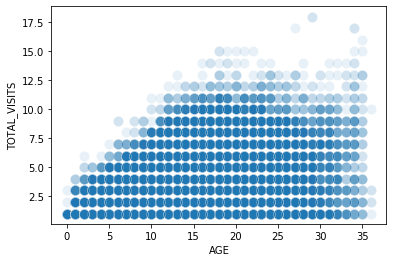

In [212]:
sns.scatterplot(x='AGE', y='TOTAL_VISITS', s=100, alpha=.1, data=df3)

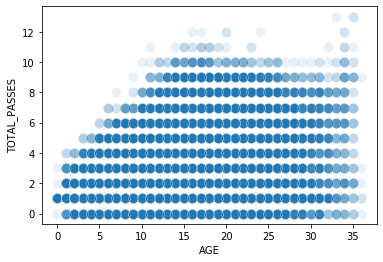

In [213]:
sns.scatterplot(x='AGE', y='TOTAL_PASSES', s=100, alpha=.1, data=df3)

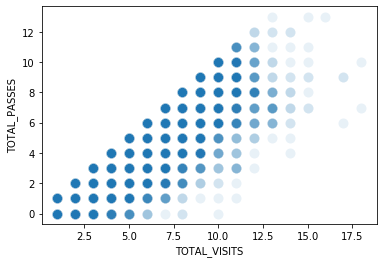

In [214]:
sns.scatterplot(x='TOTAL_VISITS', y='TOTAL_PASSES', s=100, alpha=.1, data=df3)

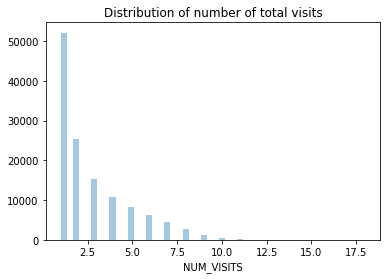

In [215]:
sns.distplot(df3['NUM_VISITS'], kde=False)
plt.title('Distribution of number of total visits')
plt.show()

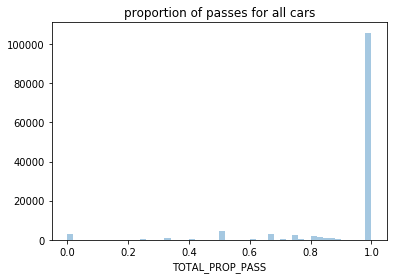

In [216]:
sns.distplot(df3['TOTAL_PROP_PASS'], kde=False)
plt.title('proportion of passes for all cars')
plt.show()

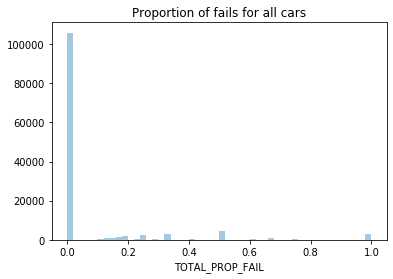

In [217]:
sns.distplot(df3['TOTAL_PROP_FAIL'], kde=False)
plt.title('Proportion of fails for all cars')
plt.show()

Again but only with cars who have been tested more than once.

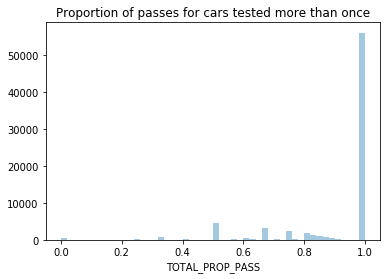

In [218]:
sns.distplot(df3.loc[df3['TOTAL_VISITS']>1, 'TOTAL_PROP_PASS'], kde=False)
plt.title('Proportion of passes for cars tested more than once')
plt.show()

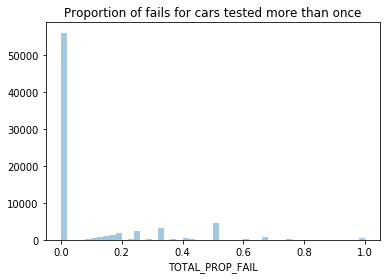

In [219]:
sns.distplot(df3.loc[df3['TOTAL_VISITS']>1,'TOTAL_PROP_FAIL'], kde=False)
plt.title('Proportion of fails for cars tested more than once')
plt.show()

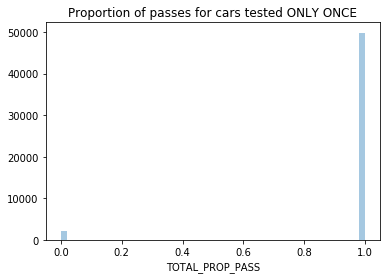

In [220]:
sns.distplot(df3.loc[df3['TOTAL_VISITS']==1, 'TOTAL_PROP_PASS'], kde=False)
plt.title('Proportion of passes for cars tested ONLY ONCE')
plt.show()

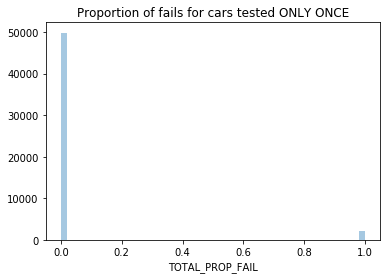

In [221]:
sns.distplot(df3.loc[df3['TOTAL_VISITS']==1, 'TOTAL_PROP_FAIL'], kde=False)
plt.title('Proportion of fails for cars tested ONLY ONCE')
plt.show()

Achtung! The next 2 plots take ~30 seconds to generate.

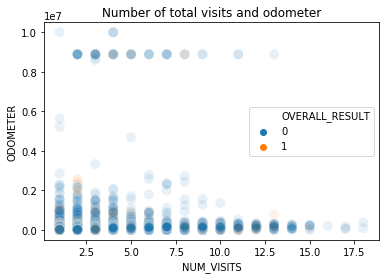

In [222]:
sns.scatterplot(x='NUM_VISITS', y='ODOMETER', s=100, alpha=.1, hue='OVERALL_RESULT', data=df3)
plt.title('Number of total visits and odometer')
plt.show()

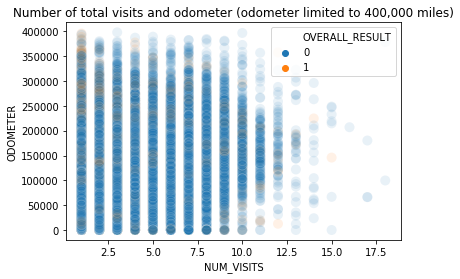

In [223]:
sns.scatterplot(x='NUM_VISITS', y='ODOMETER', s=100, alpha=.1, hue='OVERALL_RESULT', data=df3[df3['ODOMETER']<400000])
plt.title('Number of total visits and odometer (odometer limited to 400,000 miles)')
plt.show()

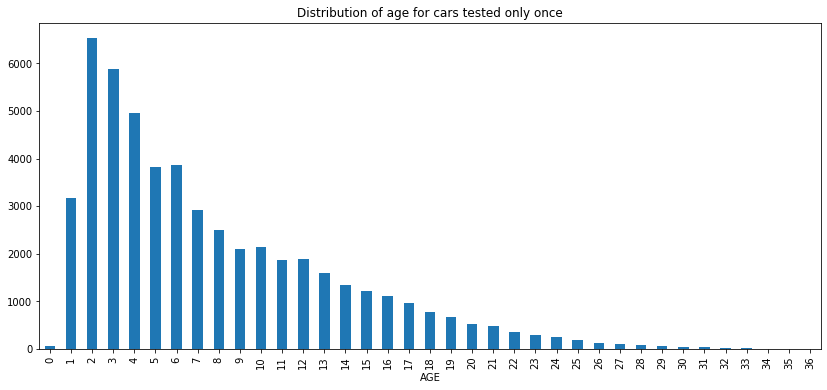

In [224]:
fig, ax = plt.subplots(figsize=(14,6))
df3[df3['NUM_VISITS']==1].groupby('AGE').size().plot.bar()
plt.title('Distribution of age for cars tested only once')
plt.show()

The cars who have only been checked once tend to be newer cars, although we do see some older cars. The older cars are likely used cars from outside Bernalillo county. 

Of note is the expontential decline in age.

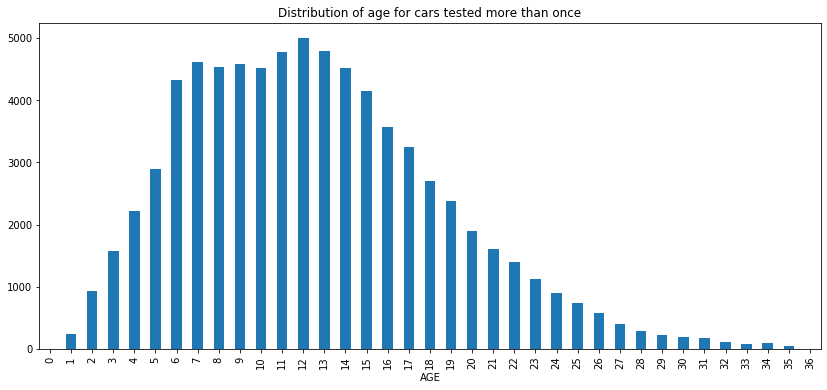

In [225]:
fig, ax = plt.subplots(figsize=(14,6))
df3[df3['NUM_VISITS']>1].groupby('AGE').size().plot.bar()
plt.title('Distribution of age for cars tested more than once')
plt.show()

With the cars that have been tested more than once, we see that they follow the same distribution as when they were all combined.

### Create columns that has visit number for each car, and the number of fails & passes for that visit.

Data frame reminder:

`df2` has a column with the total number of visits that a car has, but not which visit number corresponds to which row.

`df3` just has the most recent row for each individual car and its total number of visits and respective number of passes and fails.

In [226]:
len(df2), len(df3)

(346523, 127562)

In [227]:
df2.tail()

,RecordID,RECORD_NUM,VIR_CERT_NUMBER,STATION_NUM,ANALYZER_NUM,INSPECTOR_NUM,TEST_TYPE,VID_TEST_TYPE,TEST_SDATE,TEST_EDATE,VIN,VIN_SOURCE,VEH_LICENSE,GVW_TYPE,GVWR,MODEL_YEAR,MAKE,MODEL,CYL,ENGINE_SIZE,TRANS_TYPE,DUAL_EXHAUST,ODOMETER,FUEL_TYPE,VEHICLE_TYPE,EMISS_COST,ZIP_CODE,CERTIFICATION,ESC,VRT_RECORD_ID,E_TEST_SEQUENCE,E_PRECOND_PROCEDURE,E_HIGH_DCF,E_HIGH_RPM,E_HIGH_CO2,E_HIGH_O2,E_HIGH_HC,E_HIGH_HC_DCF,E_HIGH_HC_LIMIT,E_HIGH_CO,E_HIGH_CO_DCF,E_HIGH_CO_LIMIT,E_IDLE_DCF,E_IDLE_RPM,E_IDLE_CO2,E_IDLE_O2,E_IDLE_HC,E_IDLE_HC_DCF,E_IDLE_HC_LIMIT,E_IDLE_CO,E_IDLE_CO_DCF,E_IDLE_CO_LIMIT,E_HIGH_DCF_2,E_HIGH_RPM_2,E_HIGH_CO2_2,E_HIGH_O2_2,E_HIGH_HC_2,E_HIGH_HC_DCF_2,E_HIGH_CO_2,E_HIGH_CO_DCF_2,E_IDLE_DCF_2,E_IDLE_RPM_2,E_IDLE_CO2_2,E_IDLE_O2_2,E_IDLE_HC_2,E_IDLE_HC_DCF_2,E_IDLE_CO_2,E_IDLE_CO_DCF_2,E_RESULT_STRING,V_SMOKE1,V_SMOKE2,V_GASCAP,V_CAT,V_RESULT,KOEO_RESULT,KOER_RESULT,OBD_RDY_MISFIRE,OBD_RDY_FUEL,OBD_RDY_COMPONENT,OBD_RDY_CAT,OBD_RDY_CAT_HEATED,OBD_RDY_EVAP,OBD_RDY_SEC_AIR,OBD_RDY_AIR_COND,OBD_RDY_O2_SENSOR,OBD_RDY_O2_HEATER,OBD_RDY_EGR,OBD_RDY_RESULT,OBD_PID,OBD_PCM_ID,OBD_VIN,OBD_FLT_CODES,OBD_FLT_RESULT,OBD_MIL_STATUS,OBD_RESULT,ONLINE_STATUS,OFFLINE_REASON_CODE,ABORT_CODE,SOFTWARE_VERSION,INSP_COMMENTS,OVERALL_RESULT,R_TOTAL_COST,R_EGR,R_ELECTRICAL,R_EVAP_CONTROL,R_EXHAUST,R_IGNITION,R_INTAKE,R_ENGINE,R_PCV,R_OTHER,SentToWW,ABORT_CODE_OTHER_DESC,OBDII_AFFECT_OVERALL,E_HIGH_CO_RESULT,E_HIGH_HC_RESULT,E_IDLE_CO_RESULT,E_IDLE_HC_RESULT,MECHANIC_LAST_NAME,MECHANIC_FIRST_NAME,MECHANIC_MIDDLE_INIT,ENGINE_SIZE_ORIG,FAILED_IDLE_RPM,SENTTOVID,Station_License_Number,Analyzer_Number,Insert_DateTime\r,AGE,NUM_VISITS,TOTAL_VISITS,TOTAL_PASSES,TOTAL_FAILS
249064,4465446,747,8682023.0,IS391,W012,AC086233,I,NaN,2019-07-10 17:23:12,2019-07-10 17:27:14,ZHWGU12T36LA03105,S,BADBULL,1.0,3750,2006,LAMBORGHINI,GALLARDO,10,5000,M,N,10600,G,1,24.99,87122,C,6.0,20060463,1,1,0.0,0,0.0,0.0,0,0,100,0.0,0.0,1.0,0.0,0,0.0,0.0,0,0,100,0.0,0.0,1.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,N,N,P,N,P,P,P,P,1.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,P,23.0,01,ZHWGU12T36LA03105,"P1426,P0437,P1426",F,0.0,F,1,0,NaN,249,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,N,N,N,N,YAZZIE,LOGAN,K,NaN,NaN,0.0,IS391,W012,2019-07-10 16:28:18\r,14,6,6,5.0,1.0
249065,4552842,1523,8767000.0,IS391,W012,AC086499,I,NaN,2019-11-04 15:34:52,2019-11-04 15:39:27,ZHWGU12T36LA03105,M,BADBULL,1.0,3750,2006,LAMBORGHINI,GALLARDO,10,5000,M,N,11234,G,1,24.99,87122,C,6.0,20060463,1,1,0.0,0,0.0,0.0,0,0,100,0.0,0.0,1.0,0.0,0,0.0,0.0,0,0,100,0.0,0.0,1.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,N,N,P,N,P,P,P,P,1.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,P,23.0,01,ZHWGU12T36LA03105,NaN,P,1.0,P,1,0,NaN,249,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,N,N,N,N,PANKRETZ,KEVIN,M,NaN,NaN,0.0,IS391,W012,2019-11-04 14:40:06\r,14,6,6,5.0,1.0
290624,3105626,20965,7267683.0,IS497,W042,AC084266,I,I,2014-09-05 11:54:00,2014-09-05 12:03:00,ZHWGU22T58LA06080,S,NPA06080,1.0,3750,2008,LAMBORGHINI,GALLARDO,10,5000,A,N,7870,G,1,19.00,87123,C,6.0,0,1,1,0.0,0,0.0,0.0,0,0,100,0.0,0.0,1.0,0.0,0,0.0,0.0,0,0,100,0.0,0.0,1.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,N,N,P,N,P,P,P,P,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,P,29.0,01,NaN,NaN,P,1.0,P,1,0,NaN,502,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,N,N,N,N,N,Allen,Michael,S,NaN,NaN,0.0,IS497,W042,2014-09-05 11:30:11\r,7,3,3,3.0,0.0
290625,3688780,14452,7710905.0,IS424,W111,AC083877,I,I,2016-09-10 09:39:00,2016-09-10 09:41:00,ZHWGU22T58LA06080,S,857STA,1.0,3750,2008,LAMBORGHINI,GALLARDO,10,5000,M,N,8915,G,1,21.00,87123,C,6.0,0,1,1,0.0,0,0.0,0.0,0,0,100,0.0,0.0,1.0,0.0,0,0.0,0.0,0,0,100,0.0,0.0,1.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,N,N,P,N,P,P,P,P,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,P,23.0,01,ZHWGU22T58LA06080,NaN,P,1.0,P,1,0,NaN,503,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,N,N,N,N,N,KASSMAN,JASON,R,NaN,NaN,0.0,IS424,W111,2016-09-10 08:40:16.000\r,9,3,3,3.0,0.0
290

In [228]:
# Get the visit number using the function cumcount()
df2['VISIT_NUM'] = df2.groupby('VIN').cumcount() + 1

In [229]:
# check that it worked properly
df2.tail()

,RecordID,RECORD_NUM,VIR_CERT_NUMBER,STATION_NUM,ANALYZER_NUM,INSPECTOR_NUM,TEST_TYPE,VID_TEST_TYPE,TEST_SDATE,TEST_EDATE,VIN,VIN_SOURCE,VEH_LICENSE,GVW_TYPE,GVWR,MODEL_YEAR,MAKE,MODEL,CYL,ENGINE_SIZE,TRANS_TYPE,DUAL_EXHAUST,ODOMETER,FUEL_TYPE,VEHICLE_TYPE,EMISS_COST,ZIP_CODE,CERTIFICATION,ESC,VRT_RECORD_ID,E_TEST_SEQUENCE,E_PRECOND_PROCEDURE,E_HIGH_DCF,E_HIGH_RPM,E_HIGH_CO2,E_HIGH_O2,E_HIGH_HC,E_HIGH_HC_DCF,E_HIGH_HC_LIMIT,E_HIGH_CO,E_HIGH_CO_DCF,E_HIGH_CO_LIMIT,E_IDLE_DCF,E_IDLE_RPM,E_IDLE_CO2,E_IDLE_O2,E_IDLE_HC,E_IDLE_HC_DCF,E_IDLE_HC_LIMIT,E_IDLE_CO,E_IDLE_CO_DCF,E_IDLE_CO_LIMIT,E_HIGH_DCF_2,E_HIGH_RPM_2,E_HIGH_CO2_2,E_HIGH_O2_2,E_HIGH_HC_2,E_HIGH_HC_DCF_2,E_HIGH_CO_2,E_HIGH_CO_DCF_2,E_IDLE_DCF_2,E_IDLE_RPM_2,E_IDLE_CO2_2,E_IDLE_O2_2,E_IDLE_HC_2,E_IDLE_HC_DCF_2,E_IDLE_CO_2,E_IDLE_CO_DCF_2,E_RESULT_STRING,V_SMOKE1,V_SMOKE2,V_GASCAP,V_CAT,V_RESULT,KOEO_RESULT,KOER_RESULT,OBD_RDY_MISFIRE,OBD_RDY_FUEL,OBD_RDY_COMPONENT,OBD_RDY_CAT,OBD_RDY_CAT_HEATED,OBD_RDY_EVAP,OBD_RDY_SEC_AIR,OBD_RDY_AIR_COND,OBD_RDY_O2_SENSOR,OBD_RDY_O2_HEATER,OBD_RDY_EGR,OBD_RDY_RESULT,OBD_PID,OBD_PCM_ID,OBD_VIN,OBD_FLT_CODES,OBD_FLT_RESULT,OBD_MIL_STATUS,OBD_RESULT,ONLINE_STATUS,OFFLINE_REASON_CODE,ABORT_CODE,SOFTWARE_VERSION,INSP_COMMENTS,OVERALL_RESULT,R_TOTAL_COST,R_EGR,R_ELECTRICAL,R_EVAP_CONTROL,R_EXHAUST,R_IGNITION,R_INTAKE,R_ENGINE,R_PCV,R_OTHER,SentToWW,ABORT_CODE_OTHER_DESC,OBDII_AFFECT_OVERALL,E_HIGH_CO_RESULT,E_HIGH_HC_RESULT,E_IDLE_CO_RESULT,E_IDLE_HC_RESULT,MECHANIC_LAST_NAME,MECHANIC_FIRST_NAME,MECHANIC_MIDDLE_INIT,ENGINE_SIZE_ORIG,FAILED_IDLE_RPM,SENTTOVID,Station_License_Number,Analyzer_Number,Insert_DateTime\r,AGE,NUM_VISITS,TOTAL_VISITS,TOTAL_PASSES,TOTAL_FAILS,VISIT_NUM
249064,4465446,747,8682023.0,IS391,W012,AC086233,I,NaN,2019-07-10 17:23:12,2019-07-10 17:27:14,ZHWGU12T36LA03105,S,BADBULL,1.0,3750,2006,LAMBORGHINI,GALLARDO,10,5000,M,N,10600,G,1,24.99,87122,C,6.0,20060463,1,1,0.0,0,0.0,0.0,0,0,100,0.0,0.0,1.0,0.0,0,0.0,0.0,0,0,100,0.0,0.0,1.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,N,N,P,N,P,P,P,P,1.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,P,23.0,01,ZHWGU12T36LA03105,"P1426,P0437,P1426",F,0.0,F,1,0,NaN,249,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,N,N,N,N,YAZZIE,LOGAN,K,NaN,NaN,0.0,IS391,W012,2019-07-10 16:28:18\r,14,6,6,5.0,1.0,5
249065,4552842,1523,8767000.0,IS391,W012,AC086499,I,NaN,2019-11-04 15:34:52,2019-11-04 15:39:27,ZHWGU12T36LA03105,M,BADBULL,1.0,3750,2006,LAMBORGHINI,GALLARDO,10,5000,M,N,11234,G,1,24.99,87122,C,6.0,20060463,1,1,0.0,0,0.0,0.0,0,0,100,0.0,0.0,1.0,0.0,0,0.0,0.0,0,0,100,0.0,0.0,1.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,N,N,P,N,P,P,P,P,1.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,P,23.0,01,ZHWGU12T36LA03105,NaN,P,1.0,P,1,0,NaN,249,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,N,N,N,N,PANKRETZ,KEVIN,M,NaN,NaN,0.0,IS391,W012,2019-11-04 14:40:06\r,14,6,6,5.0,1.0,6
290624,3105626,20965,7267683.0,IS497,W042,AC084266,I,I,2014-09-05 11:54:00,2014-09-05 12:03:00,ZHWGU22T58LA06080,S,NPA06080,1.0,3750,2008,LAMBORGHINI,GALLARDO,10,5000,A,N,7870,G,1,19.00,87123,C,6.0,0,1,1,0.0,0,0.0,0.0,0,0,100,0.0,0.0,1.0,0.0,0,0.0,0.0,0,0,100,0.0,0.0,1.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,N,N,P,N,P,P,P,P,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,P,29.0,01,NaN,NaN,P,1.0,P,1,0,NaN,502,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,N,N,N,N,N,Allen,Michael,S,NaN,NaN,0.0,IS497,W042,2014-09-05 11:30:11\r,7,3,3,3.0,0.0,1
290625,3688780,14452,7710905.0,IS424,W111,AC083877,I,I,2016-09-10 09:39:00,2016-09-10 09:41:00,ZHWGU22T58LA06080,S,857STA,1.0,3750,2008,LAMBORGHINI,GALLARDO,10,5000,M,N,8915,G,1,21.00,87123,C,6.0,0,1,1,0.0,0,0.0,0.0,0,0,100,0.0,0.0,1.0,0.0,0,0.0,0.0,0,0,100,0.0,0.0,1.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,N,N,P,N,P,P,P,P,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,P,23.0,01,ZHWGU22T58LA06080,NaN,P,1.0,P,1,0,NaN,503,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,N,N,N,N,N,KASSMAN,JASON,R,NaN,NaN,0.0,IS424,W111,2016-09-10 08:40:16.000\r,9

In [230]:
list(df2)

['RecordID',
 'RECORD_NUM',
 'VIR_CERT_NUMBER',
 'STATION_NUM',
 'ANALYZER_NUM',
 'INSPECTOR_NUM',
 'TEST_TYPE',
 'VID_TEST_TYPE',
 'TEST_SDATE',
 'TEST_EDATE',
 'VIN',
 'VIN_SOURCE',
 'VEH_LICENSE',
 'GVW_TYPE',
 'GVWR',
 'MODEL_YEAR',
 'MAKE',
 'MODEL',
 'CYL',
 'ENGINE_SIZE',
 'TRANS_TYPE',
 'DUAL_EXHAUST',
 'ODOMETER',
 'FUEL_TYPE',
 'VEHICLE_TYPE',
 'EMISS_COST',
 'ZIP_CODE',
 'CERTIFICATION',
 'ESC',
 'VRT_RECORD_ID',
 'E_TEST_SEQUENCE',
 'E_PRECOND_PROCEDURE',
 'E_HIGH_DCF',
 'E_HIGH_RPM',
 'E_HIGH_CO2',
 'E_HIGH_O2',
 'E_HIGH_HC',
 'E_HIGH_HC_DCF',
 'E_HIGH_HC_LIMIT',
 'E_HIGH_CO',
 'E_HIGH_CO_DCF',
 'E_HIGH_CO_LIMIT',
 'E_IDLE_DCF',
 'E_IDLE_RPM',
 'E_IDLE_CO2',
 'E_IDLE_O2',
 'E_IDLE_HC',
 'E_IDLE_HC_DCF',
 'E_IDLE_HC_LIMIT',
 'E_IDLE_CO',
 'E_IDLE_CO_DCF',
 'E_IDLE_CO_LIMIT',
 'E_HIGH_DCF_2',
 'E_HIGH_RPM_2',
 'E_HIGH_CO2_2',
 'E_HIGH_O2_2',
 'E_HIGH_HC_2',
 'E_HIGH_HC_DCF_2',
 'E_HIGH_CO_2',
 'E_HIGH_CO_DCF_2',
 'E_IDLE_DCF_2',
 'E_IDLE_RPM_2',
 'E_IDLE_CO2_2',
 'E_IDLE_O2_

*Now add the number of fails/passes at a given point*

In [231]:
# can use cumsum() to simply add up the cumulative fails. Fails = 1, Passes = 0.
df2['FAIL_NUM'] = df2.groupby('VIN')['OVERALL_RESULT'].cumsum()

In [232]:
# check
df2[['VIN','TOTAL_VISITS','TOTAL_FAILS', 'VISIT_NUM','FAIL_NUM']]

,VIN,TOTAL_VISITS,TOTAL_FAILS,VISIT_NUM,FAIL_NUM
99795,0F1AC4222PB200660,1,0.0,1,0
312848,0FMCU93158KD84024,1,0.0,1,0
318101,0N1BC11E69L466681,1,0.0,1,0
45035,0N8AR05SXVW181282,1,0.0,1,0
271394,0S4BP62C377301194,1,0.0,1,0
...,...,...,...,...,...
249064,ZHWGU12T36LA03105,6,1.0,5,1
249065,ZHWGU12T36LA03105,6,1.0,6,1
290624,ZHWGU22T58LA06080,3,0.0,1,0
290625,ZHWGU22T58LA06080,3,0.0,2,0


In [233]:
# add "PASS_NUM" which will be VISIT_NUM - FAIL_NUM
df2['PASS_NUM'] = df2['VISIT_NUM']-df2['FAIL_NUM']

In [234]:
# add proportion fail and proprtion pass for each visit number. 
df2['PROP_PASS'] = df2['PASS_NUM']/df2['VISIT_NUM']
df2['PROP_FAIL'] = df2['FAIL_NUM']/df2['VISIT_NUM']

**MORE PLOTTING!**

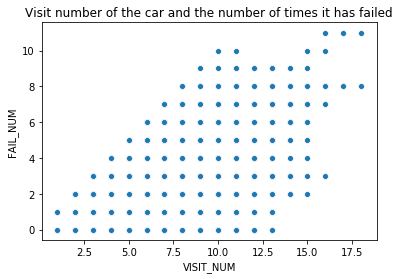

In [235]:
sns.scatterplot(x=df2['VISIT_NUM'], y=df2['FAIL_NUM'])
plt.title('Visit number of the car and the number of times it has failed')
plt.show()

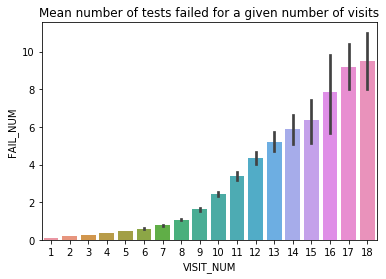

In [236]:
# bar plot - x axis has the visit number and the bars are color coded by number of fails and number of passes at the time of that visit. 

sns.barplot(x='VISIT_NUM', y='FAIL_NUM', data=df2)
plt.title('Mean number of tests failed for a given number of visits')
plt.show()

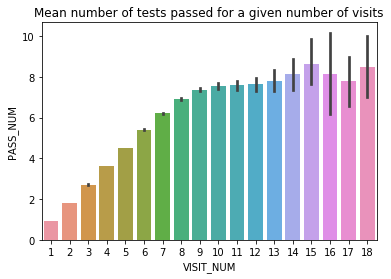

In [237]:
sns.barplot(x='VISIT_NUM', y='PASS_NUM', data=df2)
plt.title('Mean number of tests passed for a given number of visits')
plt.show()

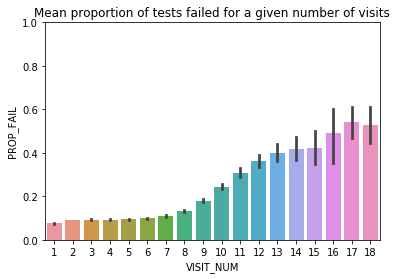

In [238]:
sns.barplot(x='VISIT_NUM', y='PROP_FAIL', data=df2)
plt.title('Mean proportion of tests failed for a given number of visits')
plt.ylim([0,1])
plt.show()

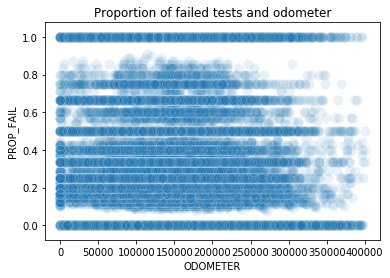

In [239]:
sns.scatterplot(x='ODOMETER', y='PROP_FAIL', s=100, alpha=.1, data=df2[df2['ODOMETER']<400000])
plt.title('Proportion of failed tests and odometer')
plt.show()

This plot is not really that useful. Try another.

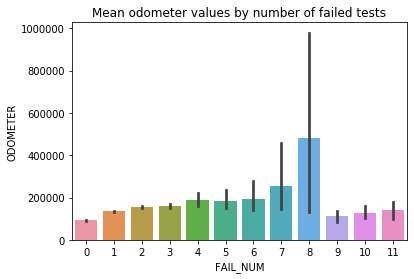

In [240]:
sns.barplot(x='FAIL_NUM', y='ODOMETER', data=df2)
plt.title('Mean odometer values by number of failed tests')
plt.show()

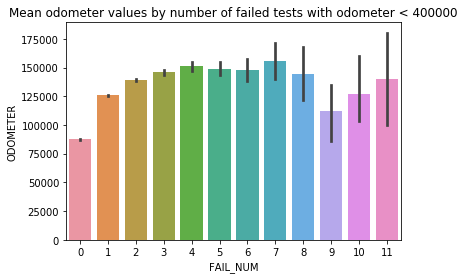

In [241]:
sns.barplot(x='FAIL_NUM', y='ODOMETER', data=df2[df2['ODOMETER']<400000])
plt.title('Mean odometer values by number of failed tests with odometer < 400000')
plt.show()

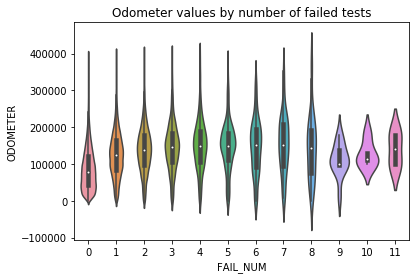

In [242]:
# get a look at the distribution of the data within each.
sns.violinplot(x='FAIL_NUM', y='ODOMETER', data=df2[df2['ODOMETER']<400000])
plt.title('Odometer values by number of failed tests')
plt.show()

Can see that the odometer values follow a relatively uniform distribution with the number of fails. Would have expected that there would be higher odometer values associated with a higher number of fails. However, it seems that odometer does not really catch everything that has to do with the car - other indicators about quality are not captured by odometer alone. 

### Add another column with the change in odometer since last test (for cars tested more than once) 

If the car has only been tested once, just add nans?

In [243]:
df2['ODOMETER_CHANGE'] = df2.groupby('VIN')['ODOMETER'].diff()

### Add another column with time since last test (for cars tested more than once) 

In [254]:
df2['TIME_CHANGE'] = df2.groupby('VIN')['TEST_SDATE'].diff()

In [259]:
df2['TIME_CHANGE'].isnull()

99795      True
312848     True
318101     True
45035      True
271394     True
          ...  
249064    False
249065    False
290624     True
290625    False
290626    False
Name: TIME_CHANGE, Length: 346523, dtype: bool

In [281]:
df2['TIME_CHANGE_DAYS'] = df2.groupby('VIN')['TEST_SDATE'].diff().dt.days

##### Now more plotting!

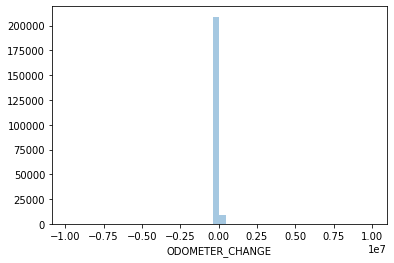

In [282]:
# displot can't deal with NaNs 
sns.distplot(df2[df2['ODOMETER_CHANGE'].notnull()]['ODOMETER_CHANGE'], kde=False)

##### Clean the data a bit - get rid of all NaNs and negative values in the `ODOMETER_CHANGE` column and the `TIME_CHANGE` and `TIME_CHANGE_DAYS` columns

For the `ODOMETER_CHANGE`: Using the logical, >0 will automatically get rid of the NaNs.

In [284]:
df2_change = df2[(df2['ODOMETER_CHANGE']>0)]

In [285]:
len(df2_change)

209498

In [286]:
# get rid of columns where the time change is null
df2_change = df2_change[~df2_change['TIME_CHANGE'].isnull()]

In [297]:
# get rid of columns where the time change is negative
df2_change = df2_change[df2_change['TIME_CHANGE_DAYS']>0]

In [298]:
df2_change['TIME_CHANGE']

341010     89 days 06:53:27
296222    828 days 21:59:00
250465    996 days 00:55:00
66755    1423 days 03:01:00
66756     243 days 00:10:00
                ...        
249063    670 days 01:34:48
249064    762 days 03:45:24
249065    116 days 22:11:40
290625    735 days 21:45:00
290626    968 days 06:10:53
Name: TIME_CHANGE, Length: 202862, dtype: timedelta64[ns]

In [299]:
df2_change.TIME_CHANGE_DAYS

341010      89.0
296222     828.0
250465     996.0
66755     1423.0
66756      243.0
           ...  
249063     670.0
249064     762.0
249065     116.0
290625     735.0
290626     968.0
Name: TIME_CHANGE_DAYS, Length: 202862, dtype: float64

In [300]:
print(f'Looking at change in odometer values and change in time values yields {len(df2_change)} non-NaN and non-negative values from the original dataset of size {len(df2)}, or {round(len(df2_change)/len(df2)*100, 2)} percent of the entries yielded informative change in odometer and time results.')

Looking at change in odometer values and change in time values yields 202862 non-NaN and non-negative values from the original dataset of size 346523, or 58.54 percent of the entries yielded informative change in odometer and time results.


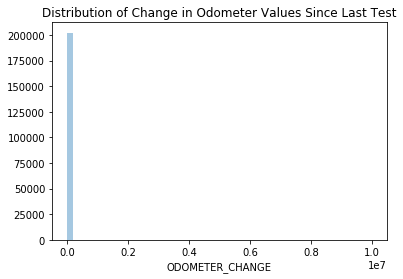

In [301]:
sns.distplot(df2_change['ODOMETER_CHANGE'], kde=False)
plt.title('Distribution of Change in Odometer Values Since Last Test')
plt.show()

In [302]:
df2_change.ODOMETER_CHANGE.value_counts()

1.0        134
15.0       105
20.0       104
12.0       103
30.0        97
          ... 
58178.0      1
31911.0      1
66932.0      1
55840.0      1
81679.0      1
Name: ODOMETER_CHANGE, Length: 52553, dtype: int64

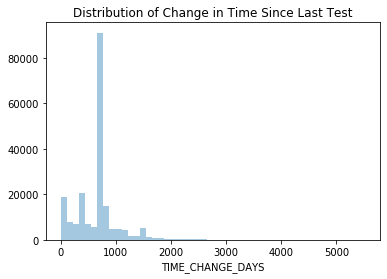

In [303]:
sns.distplot(df2_change['TIME_CHANGE_DAYS'], kde=False)
plt.title('Distribution of Change in Time Since Last Test')
plt.show()

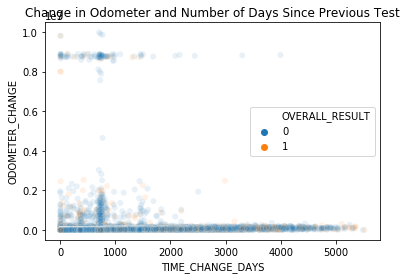

In [304]:
sns.scatterplot(x='TIME_CHANGE_DAYS', y='ODOMETER_CHANGE', alpha=.1, hue='OVERALL_RESULT',data=df2_change)
plt.title('Change in Odometer and Number of Days Since Previous Test')
plt.show()

Again with a limited time change range - people should be coming every 2 years which means ~730 days.

Limiting it to 1095 is 3 years.

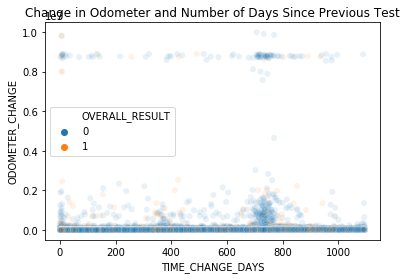

In [305]:
sns.scatterplot(x='TIME_CHANGE_DAYS', y='ODOMETER_CHANGE', alpha=.1, hue='OVERALL_RESULT',data=df2_change[df2_change['TIME_CHANGE_DAYS']<1095])
plt.title('Change in Odometer and Number of Days Since Previous Test')
plt.show()

Since a million miles is impossible for most cars, it's unlikely that this change happened between 2 emissions tests.
Therefore, limit the odometer change to 100.000 and look at the plot. 

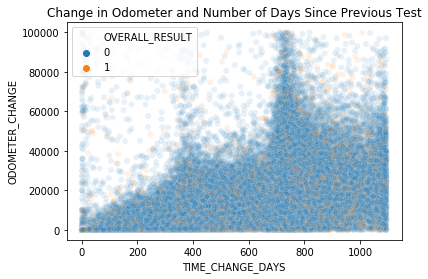

In [306]:
sns.scatterplot(x='TIME_CHANGE_DAYS', y='ODOMETER_CHANGE', alpha=.1, hue='OVERALL_RESULT',data=df2_change[(df2_change['TIME_CHANGE_DAYS']<1095) &(df2_change['ODOMETER_CHANGE']<100000)])
plt.title('Change in Odometer and Number of Days Since Previous Test')
plt.show()